### Importing Libraries

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set all seed
def set_seed(seed=42):
    np.random.seed(seed)
seed = 0
set_seed(seed)

### Defining Important Functions

In [10]:
def plot_data(df, x_col, y_col, title, xlabel, ylabel, figsize=(15,5)):
    plt.figure(figsize=figsize)
    plt.plot(df[x_col], df[y_col])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def calculate_nse(observed, predicted):
    """Calculate Nash-Sutcliffe Efficiency (NSE)"""
    numerator = np.sum((observed - predicted) ** 2)
    denominator = np.sum((observed - np.mean(observed)) ** 2)
    nse = 1 - (numerator / denominator)
    return nse

def calculate_rmse(observed, predicted):
    """Calculate Root Mean Square Error (RMSE)"""
    rmse = np.sqrt(np.mean((observed - predicted) ** 2))
    return rmse


def calculate_mae(observed, predicted):
    """Calculate Mean Absolute Error (MAE)"""
    mae = np.mean(np.abs(observed - predicted))
    return mae

def calculate_physical_consistency(observed, predicted):
    """Check if predicted values are realistic (e.g., non-negative)"""
    consistency = np.all(predicted >= 0)
    return consistency


### Loading Data

In [11]:
data_dir = './data/'

train_df = pd.read_csv(os.path.join(data_dir, 'train_data.csv'))
train_df['valid_time'] = pd.to_datetime(train_df['valid_time'])
print("Number of rows in training data:", len(train_df))

# val_df = pd.read_csv(os.path.join(data_dir, 'val_data.csv'))
# val_df['valid_time'] = pd.to_datetime(val_df['valid_time'])
# print("Number of rows in validation data:", len(val_df))

# test_df = pd.read_csv(os.path.join(data_dir, 'test_data.csv'))
# test_df['valid_time'] = pd.to_datetime(test_df['valid_time'])
# print("Number of rows in test data:", len(test_df))

Number of rows in training data: 87672


### Baseline Model

In [12]:
# give hourly data by monthly mean +random noise from standard deviation of monthly data
hourly_pred_df = train_df[['valid_time', 'tp']].copy()
hourly_pred_df['valid_time'] = pd.to_datetime(hourly_pred_df['valid_time'])
hourly_pred_df['predicted_tp'] = train_df['monthly_mean'] +  np.random.normal(loc=0, scale=train_df['monthly_std'])
hourly_pred_df['predicted_tp'] = hourly_pred_df['predicted_tp'].clip(lower=0)  # ensure non-negative values

# calculate NSE, RMSE, MAE, and physical consistency
nse = calculate_nse(train_df['tp'], hourly_pred_df['predicted_tp'])
rmse = calculate_rmse(train_df['tp'], hourly_pred_df['predicted_tp'])
mae = calculate_mae(train_df['tp'], hourly_pred_df['predicted_tp'])
physical_consistency = calculate_physical_consistency(train_df['tp'], hourly_pred_df['predicted_tp'])

print(f"NSE: {nse:.8f}")
print(f"RMSE: {rmse:.8f}")
print(f"MAE: {mae:.8f}")
print(f"Physical Consistency: {physical_consistency}")


NSE: -0.24106728
RMSE: 0.00038496
MAE: 0.00024062
Physical Consistency: True


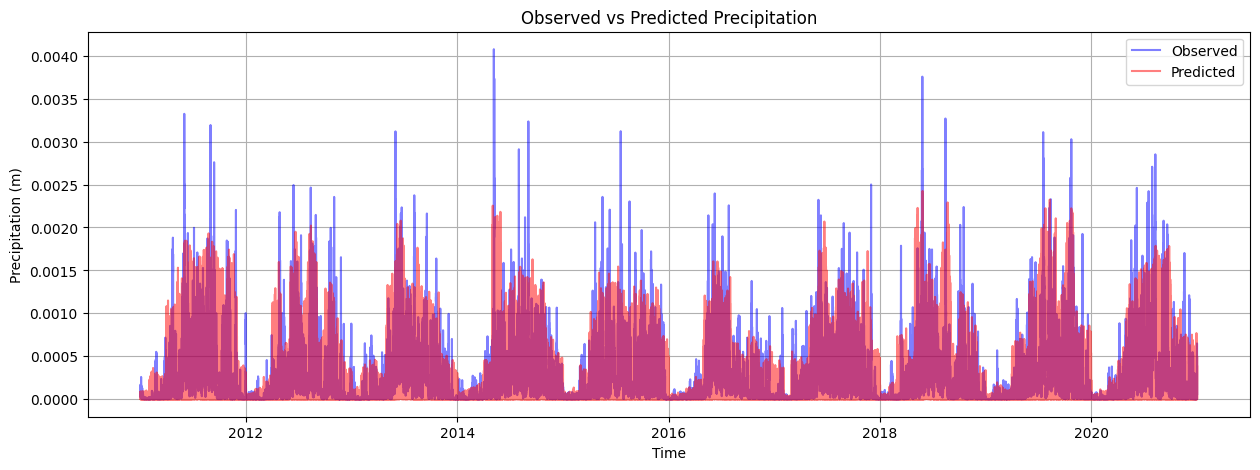

In [13]:
# plot the observed vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(train_df['valid_time'], train_df['tp'], label='Observed', color='blue', alpha=0.5)
plt.plot(hourly_pred_df['valid_time'], hourly_pred_df['predicted_tp'], label='Predicted', color='red', alpha=0.5)
plt.title('Observed vs Predicted Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (m)')
plt.legend()
plt.grid()
plt.show()